# PA 5

This is the main of my program, I decided to do it here for visualization purposes. Author: Lorenzo Beltrame

This is just the main and serves as the report of my work. I fixed a seed, therefore the results are reproducible. The functions that I call are stored in different python files located in the submission folder.

In [1]:
# custom libs
from Task_2_functions import initialize_data
from Task_2_functions import plot_image
from Task_2_functions import plot_gallery
from Task_2_functions import my_custom_pca
from Task_2_functions import encode
from Task_2_functions import decode
from Task_2_functions import centre_data
from Task_2_functions import custom_autoencoder_analysis

# standard libs
from matplotlib.pyplot import plot
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
import pickle
import os.path



# Task 1.1: implement backpropagation

# Task 2.1: data exploration

There are 34 different people in the dataset's pictures
There are 2370 different pictures of shape [62, 47]
I visualize ten different pictures presented in the dataset:


<Figure size 720x864 with 0 Axes>

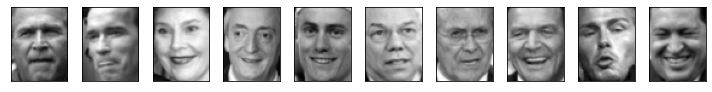


The first ten pictures are associated with:
8
4
21
25
22
5
7
9
6
13


In [2]:
# initialize data
X_train, X_test, y_train, y_test, X = initialize_data()
X, X_mean = centre_data(X)

# I center the data in X_train and X_test by subtracting the average computed wrt X
X_train = X_train - X_mean
X_test = X_test - X_mean

We can clearly notice that they are all faces of different people.

# Task 2.2: my custom PCA

I train my PCA for the requested number of principal components.

The PCA consists of three attributes:

- fit: Performs the fit to compute the principal components. In fit I: I center each column, then compute the covariance matrix, compute eigenvectors and eigenvalues of the covariance matrix, sort the eigenvalues from highest to lowest, save the computed principal components and choose K eigenvectors to get W, where K is given.

- transform: dot multiply W and X to get the projections of the design data onto the dataset.

- reconstruct_images_vectors: reconstruct images from the projection onto the principal components

I used all the dataset to do the principal component analysis and not only the train or the test dataset alone.

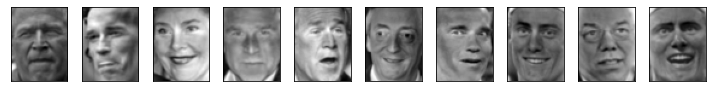

In [3]:
# plot the first then vanilla images of the dataset, those will be the one that are going to be printed
# true images, notice that centering the data means that the tonality is less intense
plot_gallery(X.T, 10)


The number of PC is: 5


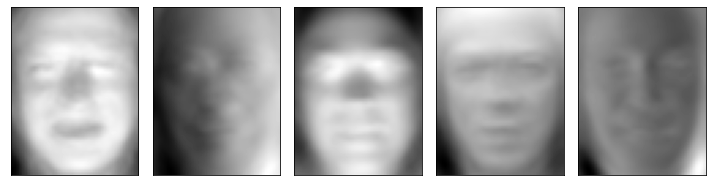

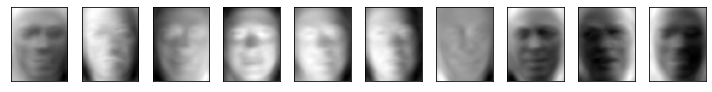

The accuracy score for the training is: 0.18746232670283303
The accuracy score fot the test is: 0.1420534458509142
The number of PC is: 10


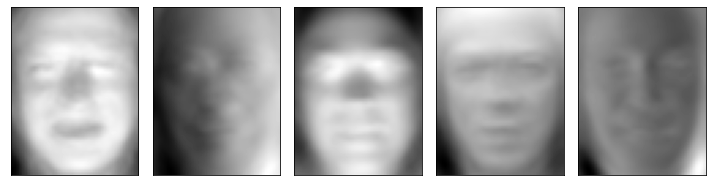

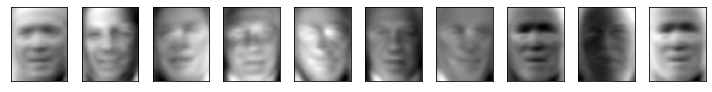

The accuracy score for the training is: 0.3333333333333333
The accuracy score fot the test is: 0.26863572433192684
The number of PC is: 20


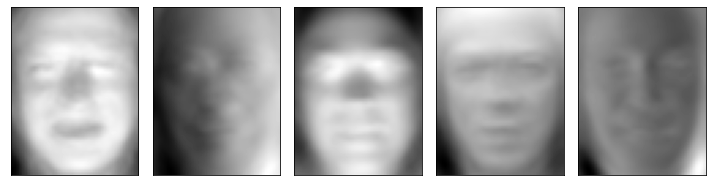

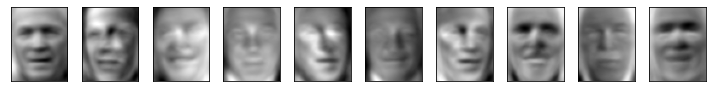

The accuracy score for the training is: 0.5316455696202531
The accuracy score fot the test is: 0.4149085794655415
The number of PC is: 40


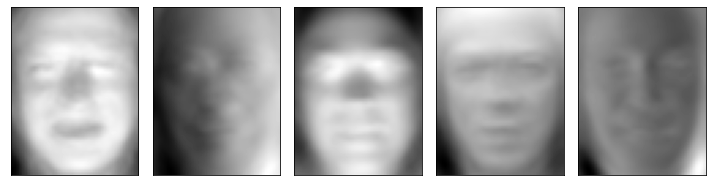

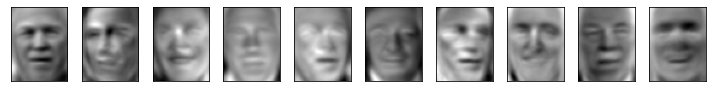

The accuracy score for the training is: 0.7703435804701627
The accuracy score fot the test is: 0.5780590717299579
The number of PC is: 80


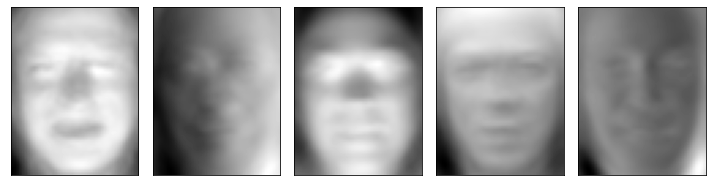

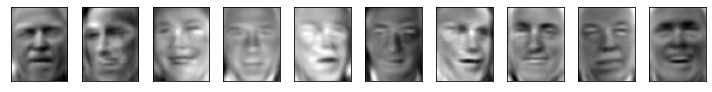

The accuracy score for the training is: 0.9770946353224834
The accuracy score fot the test is: 0.5428973277074542
The number of PC is: 160


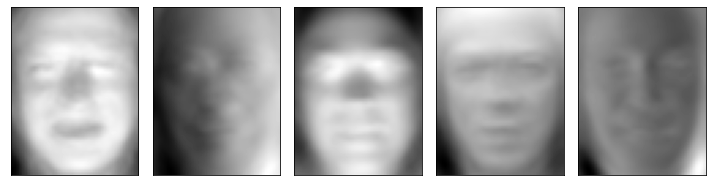

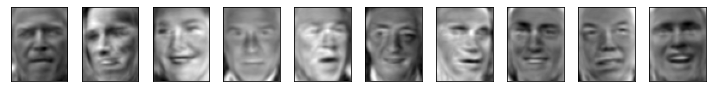

The accuracy score for the training is: 1.0
The accuracy score fot the test is: 0.5949367088607594
The number of PC is: 320


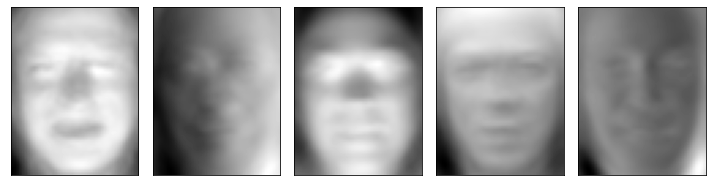

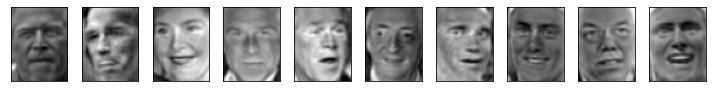

The accuracy score for the training is: 1.0
The accuracy score fot the test is: 0.6483825597749648
The number of PC is: 640


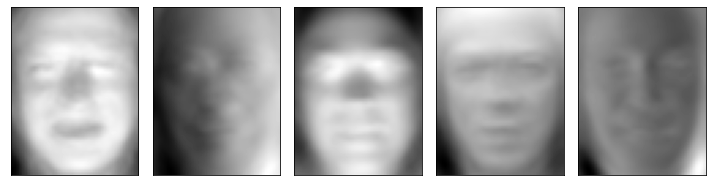

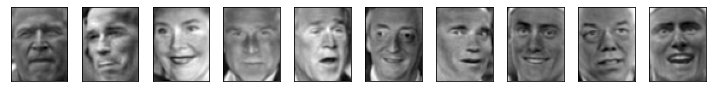

The accuracy score for the training is: 1.0
The accuracy score fot the test is: 0.6582278481012658


In [4]:
number_PC = [5, 10, 20, 40, 80, 160, 320, 640]
# convenience variables
projections = []
reconstructions = []
cache_pca = []

# initialize the scaler
my_scaler = MinMaxScaler()

# initialize the logistic classifier
# I decided to use saga as the solver
clf = LogisticRegression(max_iter=5000, solver='saga') 

# convenience variable
conv = 0

for j in number_PC:
    # print the number of PC
    print("The number of PC is: {}".format(j))
    
    # initialize
    my_pca = my_custom_pca()
    # fit
    my_pca.fit(X, j, X_mean)
    # visualize the first 5 principal components
    plot_gallery(my_pca.principal_components, num=5)
    # trasform my data in lower dimensional data
    projections.append(my_pca.transform(X).T)
    # reconstruct the projections
    reconstructions.append(my_pca.reconstruct_images_vectors())
    
    # visualize the first 10 recostructed images
    
    plot_gallery(reconstructions[conv], num=10)
    
    # scale the projections
    my_scaler.fit(projections[conv])
    # create the projection of each train/test set with the PCA fitted over all the data
    train_proj = my_pca.transform(X_train).T
    test_proj = my_pca.transform(X_test).T
    
    # fit
    clf.fit(train_proj, y_train)
    # predict
    predictions_test = clf.predict(test_proj)
    predictions_train = clf.predict(train_proj)
    # accuracy metric
    print("The accuracy score for the training is: {}".format(accuracy_score(predictions_train, y_train)))
    print("The accuracy score fot the test is: {}".format(accuracy_score(predictions_test, y_test)))
    
    # cache the PCAs
    cache_pca.append(my_pca)
    conv += 1

We can clearly observe that the reconstructed images get better and better with the increase of principal component number.

This result was expected

# Task 2.3: Autoencoders

Notice: the standard implementation of the sklearn MLP uses the ReLU as the activation function

Since we are fitting autoencoders we want to use the largest number of samples possible, in particular we use both the train and the test df.

Notice: I saved the fitted model in order to correct the assignment quicker! To test the goodness of the model just delete the model in the submission folder!

Since we are working with autoencoders, I do not center the data anymore, therefore i readd the mean.

In [5]:
# I inverse-center the data in X, X_train and X_test by adding the average computed wrt X
X = X + X_mean
X_train = X_train + X_mean
X_test = X_test + X_mean

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 40, 200, 500)


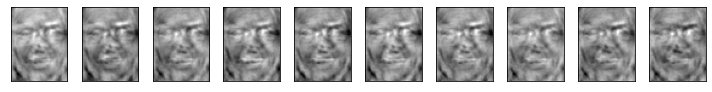

The accuracy score fot the training is: 0.379746835443038
The accuracy score fot the test is: 0.340365682137834


In [6]:
# set the parameters
a = 500
b = 200
d = 40
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_40.pkl')


NN encoder with the following hyperparameters: hidden_layer_sizes = (62, 47, 40, 47, 62)


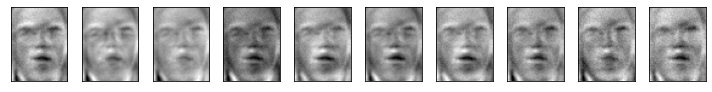

The accuracy score fot the training is: 0.4219409282700422
The accuracy score fot the test is: 0.35864978902953587


In [7]:
# set the parameters
a = 62
b = 47
d = 40
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_40_mod.pkl')


## Change the parameters

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 80, 200, 500)


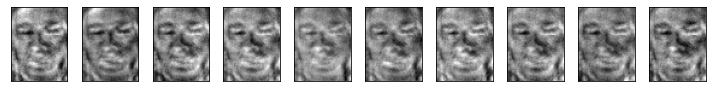

The accuracy score fot the training is: 0.5479204339963833
The accuracy score fot the test is: 0.46835443037974683


In [8]:
# set the parameters
a = 500
b = 200
d = 80
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_80.pkl')

NN encoder with the following hyperparameters: hidden_layer_sizes = (62, 47, 80, 47, 62)


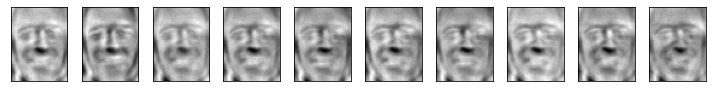

The accuracy score fot the training is: 0.510548523206751
The accuracy score fot the test is: 0.43741209563994377


In [9]:
# set the parameters
a = 62
b = 47
d = 80
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_80_mod.pkl')